In [142]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.simplefilter("ignore")
from plotnine import *

In [143]:
#loading the dataset into the dataframe
df = pd.read_csv("SampleSuperstore.csv")

#displaying the first 5 rows of df dataset
df.head() 

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


### PRELIMINARY DATA ANALYSIS

In [144]:
df.shape

(9994, 13)

In [145]:
df.info() #to check the data type of diff columns and also to look for null values(if any)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [146]:
df.nunique() #to get the no. of unique values in each of the datafield.

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [147]:
df['Category'].unique() #to get the unique value in a field

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

#### As there is no null value in the dataset we can calculate certain statistical analysis on the data

In [148]:
df.describe() #to check the aggregates of the dataset

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


#### REMOVING DUPLICATE DATA

In [149]:
df.duplicated().sum()

17

In [150]:
df = df.drop_duplicates()
df.shape

(9977, 13)

### Working on to get some basic idea about the store performance

In [151]:
#finding the total Sales and Profit made by the store

print('Total Sales: ', df['Sales'].sum())
print('Total Profit: ', df['Profit'].sum())

Total Sales:  2296195.5903
Total Profit:  286241.4226


#### From the above figures we can calculate the overall gross profit margin = 12.46%

In [152]:
#Calculating total quantities sold

print('Total Orders Received: ', df['Sales'].count())
print('Total Quantity: ', df['Quantity'].sum())

Total Orders Received:  9977
Total Quantity:  37820


Average quantities sold per order = 3.8

## REGIONAL ANALYSIS

In [153]:
df['Region'].value_counts()

West       3193
East       2845
Central    2319
South      1620
Name: Region, dtype: int64

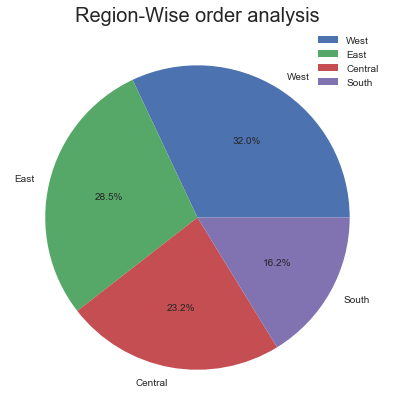

In [154]:
#analyzing the no of orders received per region

plt.figure(figsize=(7,7))
plt.pie(df['Region'].value_counts(), labels=df['Region'].value_counts().index, autopct="%.1f%%")
plt.title("Region-Wise order analysis", fontsize=20)
plt.legend()
plt.show()

This pie chart depicts that the Western region witnessed max transcations followed by Eastern, Central, and Southern region 

In [155]:
df.groupby('Region')[['Sales','Profit']].sum()

,Sales,Profit
Region,,
Central,500782.8528,39655.8752
East,678435.1960,91506.3092
South,391721.9050,46749.4303
West,725255.6365,108329.8079


#### Gross Profit Margin:
Central = 7.91%
East = 13.49%
South = 11.93%
West = 14.93%

Here we can see that GPM of central region is way lower than the overall GPM

<function matplotlib.pyplot.show(close=None, block=None)>

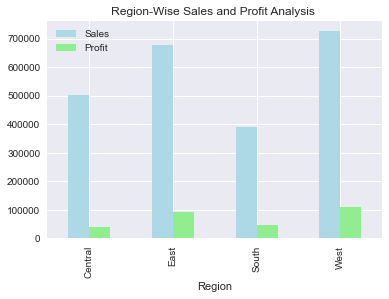

In [156]:
#Analyzing Sales and Profit from each region 

# plt.figure(figsize=(10,5))
df.groupby('Region')[['Sales','Profit']].sum().plot.bar(color=['lightblue','lightgreen'])
plt.title('Region-Wise Sales and Profit Analysis ')
plt.legend()
plt.show

In the above barlplot we can see that max sales comes from the Western region followed by the Eastern, Central, and the Southern region

Also that the Western region has max Profit followed by Eastern, Southern, and Central region

In [157]:
df.groupby(['Region','Category'])[['Sales','Profit']].sum()

Sales      Profit
Region  Category                                
Central Furniture        163407.1938  -2906.1467
        Office Supplies  166959.3470   8864.5899
        Technology       170416.3120  33697.4320
East    Furniture        208009.8320   3058.2246
        Office Supplies  205451.3830  40986.0495
        Technology       264973.9810  47462.0351
South   Furniture        117298.6840   6771.2061
        Office Supplies  125651.3130  19986.3928
        Technology       148771.9080  19991.8314
West    Furniture        252590.6035  11498.5297
        Office Supplies  220673.2010  52527.6286
        Technology       251991.8320  44303.6496

In [158]:
# df.groupby(['Region','Category'])[['Sales']].sum().reset_index()
df.groupby(['Region','Category'], as_index=False)[['Sales','Profit']].sum().pivot('Region', 'Category').fillna(0)


Sales                                  Profit                  \
Category    Furniture Office Supplies  Technology   Furniture Office Supplies   
Region                                                                          
Central   163407.1938      166959.347  170416.312  -2906.1467       8864.5899   
East      208009.8320      205451.383  264973.981   3058.2246      40986.0495   
South     117298.6840      125651.313  148771.908   6771.2061      19986.3928   
West      252590.6035      220673.201  251991.832  11498.5297      52527.6286   

                      
Category  Technology  
Region                
Central   33697.4320  
East      47462.0351  
South     19991.8314  
West      44303.6496

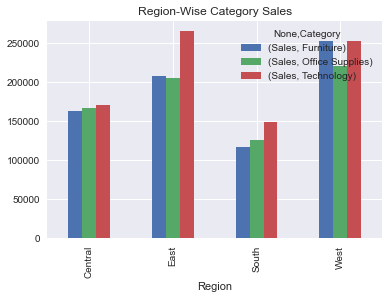

In [159]:
df.groupby(['Region','Category'], as_index=False)[['Sales']].sum().pivot('Region', 'Category').fillna(0).plot.bar()
plt.title('Region-Wise Category Sales')
plt.show()

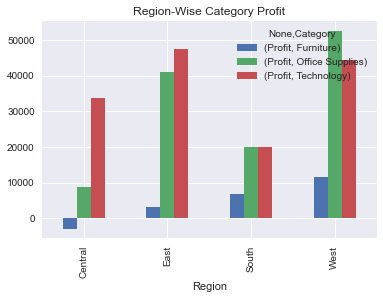

In [160]:
df.groupby(['Region','Category'], as_index=False)[['Profit']].sum().pivot('Region', 'Category').fillna(0).plot.bar()
plt.title('Region-Wise Category Profit')
plt.show()

Here we can see that the furniture category as well as the Office Supplies category are bringing down the overall GPM for the Central region.

### CATEGORY ANALYSIS

In [161]:
df.groupby('Category')[['Sales','Profit']].sum()

,Sales,Profit
Category,,
Furniture,741306.3133,18421.8137
Office Supplies,718735.2440,122364.6608
Technology,836154.0330,145454.9481


#### Gross Profit Margin:
Furniture = 2.48%
Office Supplies = 17.02%
Technology = 17.39%

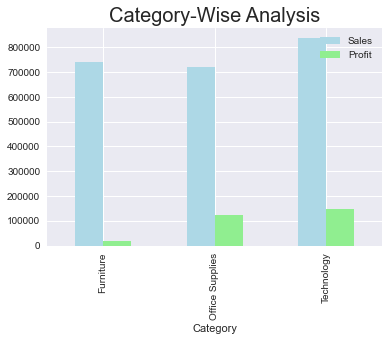

In [162]:
#Analyzinf Sales and Profit figures Category wise

df.groupby('Category')[['Sales','Profit']].sum().plot.bar(color=['lightblue','lightgreen'])
plt.title('Category-Wise Analysis', fontsize=20)
plt.legend(loc='upper right')
plt.show()

From the above barplot we can see that Technology category brings in max sales as well as max profits followed by Office Supplies and Furniture

From the above analysis we can see that inspite of hige sales in the Furniture segment profits are the lowest among all the categories.
To analyze further what is causing this decline in profit lets dive deep into the furniture segment

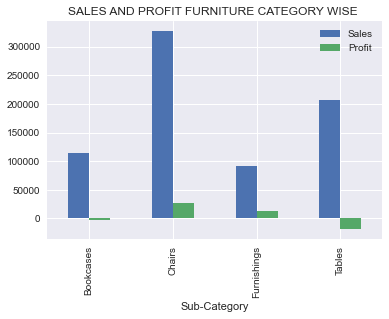

In [163]:
df[df['Category'] == 'Furniture'].groupby('Sub-Category')['Sales','Profit'].sum().plot.bar()
plt.title('SALES AND PROFIT FURNITURE CATEGORY WISE ')
plt.legend(loc = 1)
plt.show()

Here we can see that irrespective of high sales in the Bookcases and Tables segment the store is incurring losses which in turn is causing the decline of the overall Furniture segment

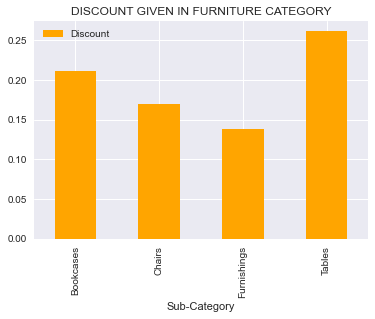

In [164]:
# To check the probable reason of loss 

df[df['Category'] == 'Furniture'].groupby('Sub-Category')['Discount'].mean().plot.bar(color =['orange'])
plt.title('DISCOUNT GIVEN IN FURNITURE CATEGORY')
plt.legend(loc = 0)
plt.show()

Despite huge discounts Bookcases and Tables Category are incurring losses

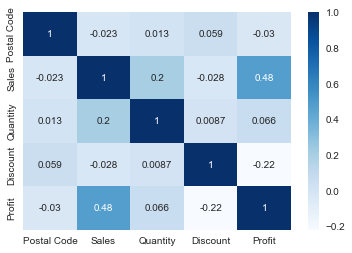

In [165]:
# To check the correlation in between Sales and Discount

sns.heatmap(df.corr(),annot=True , cmap= 'Blues')
plt.show()

From the above heatmap we can conclude that there is a negative correlation between Profit and discount and Sales and discount, whereas there is a positive correlation between Profit and Sales

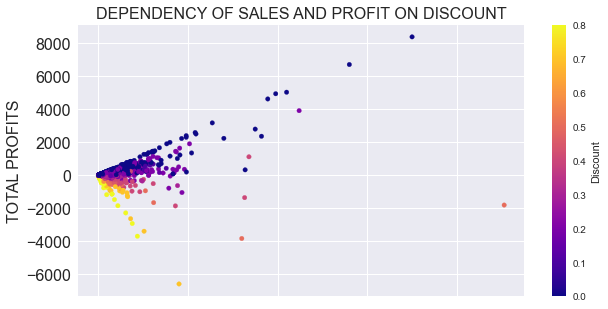

In [166]:
plt.style.use('seaborn')
df.plot(kind = 'scatter', figsize = (10,5) , x = 'Sales', y='Profit', c = 'Discount' , s = 20 , fontsize = 16 , colormap = 'plasma')
plt.ylabel('TOTAL PROFITS', fontsize = 16)
plt.title('DEPENDENCY OF SALES AND PROFIT ON DISCOUNT' , fontsize = 16)
plt.show()

The above Scatterplot depicts that less the discount more is the Profits. Discount is effecting profit to a certain extent and after that point Profits has no relation with Discount

### SUB-CATEGORY WISE ANALYSIS

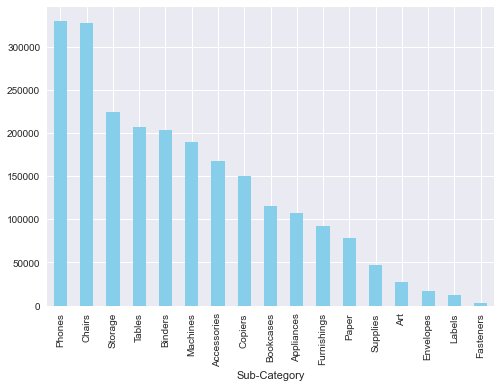

In [167]:
#Analyzing top selling products
df.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False).plot.bar(color = 'skyblue')
plt.show()

Here we can see tha Phones, Chairs, Storage, Tables, Blinders are the top selling Products 

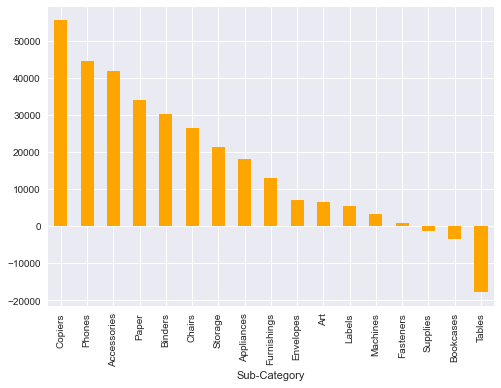

In [168]:
#To check the profit earned in all the  Sub-Categories

df.groupby('Sub-Category')['Profit'].sum().sort_values(ascending = False).plot.bar(color = 'orange')
plt.show()

Top 5 most profitable poducts are Copiers, Phones, Accessories, Paper, Blinders

### CUSTOMER ANALYSIS

In [169]:
#Analyzing Sales and Profit data segment wise

df.groupby('Segment')[['Sales','Profit']].sum()

,Sales,Profit
Segment,,
Consumer,1.160833e+06,134007.4413
Corporate,7.060701e+05,91954.9798
Home Office,4.292927e+05,60279.0015


#### Gross Profit Margin:
Consumer = 11.54%
Corporate = 13.02%
Home Office = 14.04%

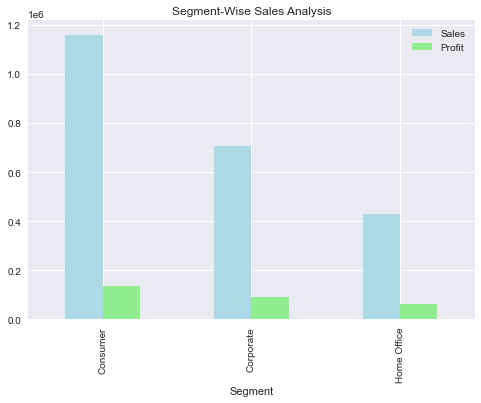

In [170]:
df.groupby('Segment')[['Sales','Profit']].sum().plot.bar(color=['lightBlue','lightGreen'])
plt.title('Segment-Wise Sales Analysis')
plt.show()

Here we can see that Consumer segment accounts for maximum sales and profits followed by Corporate and Home Office segments

In [172]:
df.groupby(['Segment','Category'])[['Sales','Profit']].sum()

Sales      Profit
Segment     Category                                
Consumer    Furniture        390659.3420   6955.9813
            Office Supplies  363773.5360  56253.6504
            Technology       406399.8970  70797.8096
Corporate   Furniture        229019.7858   7584.8158
            Office Supplies  230600.2260  40203.1660
            Technology       246450.1190  44166.9980
Home Office Furniture        121627.1855   3881.0166
            Office Supplies  124361.4820  25907.8444
            Technology       183304.0170  30490.1405

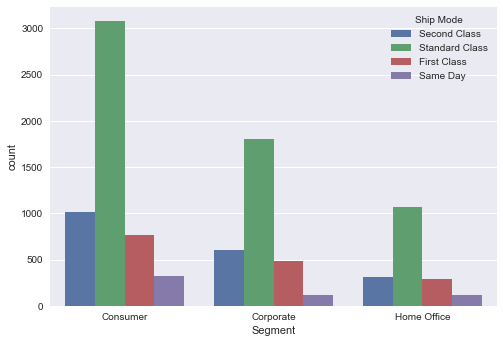

In [171]:
#Checking for ship mode segment wise

sns.countplot(x='Segment' , hue='Ship Mode' , data=df)
plt.show()

From the above we can see that Standard Class shipping is the most common ship mode across all Segments

## OBSERVATIONS:
- Maximum Sales and Profit in the Western Region
- Southern Region has the least Sales figures
- Central Region despite huge Sales has the lowest Profit and Profit Margins
- Sales of Technolgy Product is considerably higher than the other two Category in the Eastern Region
- Despite huge Sales in the Furniture Category Profits are very low compared to other categories. It is maily due to the losses  in Bookcases and Tables
- Negative correlation between Profit and discount and Sales and discount
- Positive correlation between Sales and Profit
- Phones, Chairs, Storage are the top performing products Sales wise
- Copiers, Phones, Accessories are the top performig products Profit wise
- Consumer segment accounts for maximum Sales and Profit
- Standard Class shipping is the most common ship mode across all Segments


## CONCLUSION
- We need to find ways to increase our sales in the Southern Region
- We need to increase our profit margin in the Central Region 
- Increase sales of Office Supplies and Furniture in the Easten Region
- Need to improve profit figures of the Furniture Category which can be done by lowering discounts, improving product catalogue, reducing costs etc
- Fix loss making products like Tables, Bookcases, Supplies either by improving sales or reducing costs. We can also discontinue some loss making products if required but should be done considering the strategic benefit also. 
- We should focus on improving sales in the Home Office segment which can be done by providing better price, variety of office supplies and Furniture category.